# HW01: Intro to Text Data

In this assignment, we will explore how to load a text classification dataset (AG's news, originally posted [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html)), how we can preprocess the data and extract useful information from a real-world dataset. First, we have to download the data; we only download a subset of the data with four classes.

In [78]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2023-02-27 19:15:59--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  28.10M  10.4MB/s    in 2.7s    

2023-02-27 19:16:03 (10.4 MB/s) - ‘train.csv.1’ saved [29470338/29470338]



## Inspect Data

In [79]:
import pandas as pd
df = pd.read_csv("train.csv", header=None)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,0,1,2
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


Let's make the data more human readable by adding a header and replacing labels

In [80]:
df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 

In [81]:
df.head()

,label,title,lead
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [82]:
# TODO implement a new column text which contains the lowercased title and lead (concatenated with space)
df["text"] = df["title"].str.lower() + " " + df["lead"].str.lower()
df.head()

,label,title,lead,text
0,business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",wall st. bears claw back into the black (reute...
1,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,carlyle looks toward commercial aerospace (reu...
2,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,oil and economy cloud stocks' outlook (reuters...
3,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,iraq halts oil exports from main southern pipe...
4,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","oil prices soar to all-time record, posing new..."


In [91]:
# TODO print the number of documents for each label
df["label"].value_counts()

business    30000
sci/tech    30000
sport       30000
world       30000
Name: label, dtype: int64

## Document Length

In [84]:
# TODO create a new column with the number of non-stop words in each text
df["words_count"] = df["text"].apply(lambda x: len(x.split(" ")))
# TODO plot the average number of non-stop words per label 
df.groupby(["label"])["words_count"].mean()

label
business    38.376467
sci/tech    37.626933
sport       38.183933
world       39.487567
Name: words_count, dtype: float64

## Word Frequency 

Let's implement a keyword search (similar to the baker-bloom economic uncertainty) and compute how often some given keywords ("play", "tax", "blackberry", "israel") and numbers appear in the different classes in our data

In [85]:
import re
keywords = ["play", "tax", "blackberry", "israel"]
for keyword in keywords:
    #TODO implement a regex pattern for keyword
    x = keyword
    pattern = re.compile(x, flags=re.IGNORECASE)
    def count_keyword_frequencies(x):
        #TODO implement a function which counts how often a pattern appears in a text
        num_occurrences = len(pattern.findall(x))
        return num_occurrences
    # Now, we can print how often a keyword appears in the data
    print("Total:", df["text"].apply(count_keyword_frequencies).sum())
    # and we want to find out how often the keyword appears withhin each class
    for label in df["label"].unique():
        print ("label:", label,", keyword:", keyword, end=" | ")
        #TODO print how often the keyword appears in this class
        print(df[df["label"] == label]["text"].apply(count_keyword_frequencies).sum())
        
    print("*" * 100)

Total: 8385
label: business , keyword: play | 386
label: sci/tech , keyword: play | 1929
label: sport , keyword: play | 5666
label: world , keyword: play | 404
****************************************************************************************************
Total: 1575
label: business , keyword: tax | 1214
label: sci/tech , keyword: tax | 101
label: sport , keyword: tax | 31
label: world , keyword: tax | 229
****************************************************************************************************
Total: 234
label: business , keyword: blackberry | 44
label: sci/tech , keyword: blackberry | 190
label: sport , keyword: blackberry | 0
label: world , keyword: blackberry | 0
****************************************************************************************************
Total: 3573
label: business , keyword: israel | 25
label: sci/tech , keyword: israel | 65
label: sport , keyword: israel | 66
label: world , keyword: israel | 3417
*******************************************

As a last exercise, we re-use the fuzzy keyword search implemented above and plot the total number of occurrences of "tax" (and it's variations, e.g. taxation, taxes etc.) for each class in the dataset. Hint: have a look at the [pandas bar plot with group by](https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot)

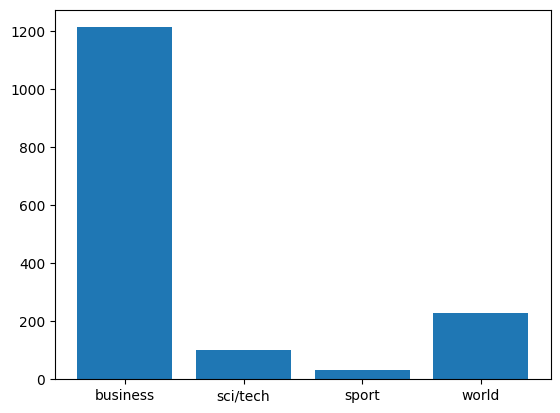

In [86]:
import matplotlib.pyplot as plt

keyword = "tax"
pattern = re.compile(keyword, flags=re.IGNORECASE)

def count_keyword_frequencies(x):
    #TODO implement a function which counts the total number of the word "tax" (and other fuzzy matches of tax) appearing in a given text
    return len(pattern.findall(x))

df["counts"] = df["text"].apply(count_keyword_frequencies)
#TODO create a bar plot for the wordcounts of "tax" for each class in the dataset
data = [(x, y[0]) for x, y in df.groupby(["label"])[["label", "counts"]].sum(numeric_only=True).iterrows()]
bar_plt = plt.bar(x=[x[0] for x in data], height=[y[1] for y in data])


In [87]:
import os

os.system('jupyter nbconvert --to html homework_01.ipynb')

[NbConvertApp] Converting notebook homework_01.ipynb to html
[NbConvertApp] Writing 614150 bytes to homework_01.html


0

In [88]:
!open homework_01.html

/bin/bash: open: command not found
